# The Greatest Olympians
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1200px-Olympic_rings_without_rims.svg.png)
Dataset URL - https://www.kaggle.com/the-guardian/olympic-games
# 1. Dataset Understanding and getting who won the most medals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Our multiple Datasets
summer = pd.read_csv("data/summer.csv")
winter = pd.read_csv("data/winter.csv")
countries = pd.read_csv("data/dictionary.csv")

# Summer Olympic Games

In [3]:
# summer olympic games
summer.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
# 1896 - 2012
summer.Year.value_counts().sort_index()

Year
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
2012    1949
Name: count, dtype: int64

In [5]:
# Gender
summer.Gender.value_counts().sort_index()

Gender
Men      22746
Women     8419
Name: count, dtype: int64

In [6]:
summer["Total"] = 1

In [7]:
# Total by Gender
total_by_gender = summer.groupby(['Year', "Gender"])['Total'].sum().reset_index().pivot_table(index='Year', columns='Gender', values='Total')
total_by_gender

Gender,Men,Women
Year,,
1896,151.0,NaN
1900,501.0,11.0
1904,458.0,12.0
1908,789.0,15.0
1912,855.0,30.0
1920,1255.0,43.0
1924,833.0,51.0
1928,615.0,95.0
1932,555.0,60.0


Text(0.5, 1.0, 'Total medals by Gender')

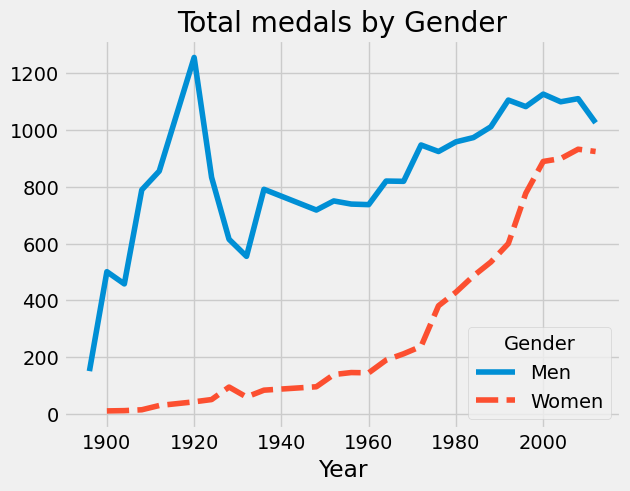

In [8]:
sns.lineplot(data=total_by_gender)
plt.title("Total medals by Gender")

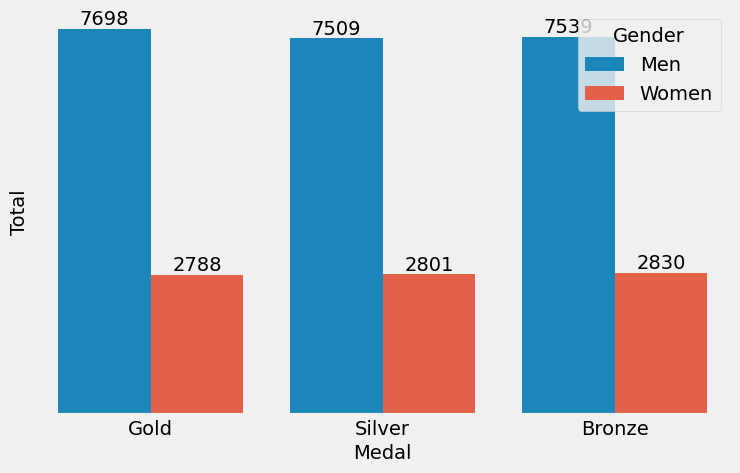

In [9]:
# Total Medals by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=summer, x="Medal", hue="Gender")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.ylabel("Total", fontsize=14)
plt.xlabel("Medal", fontsize=14)
plt.show()

In [10]:
countries = summer.groupby(['Country', 'Medal'])['Total'].sum().reset_index().pivot_table(index='Country', columns='Medal', values='Total').sort_values("Gold", ascending=False).head(5).reset_index().Country.values

total_meda_by_country = summer[summer['Country'].isin(countries)].groupby(['Country', 'Medal'])['Total'].sum().reset_index()

total_meda_by_country

,Country,Medal,Total
0,GBR,Bronze,553
1,GBR,Gold,546
2,GBR,Silver,621
3,GER,Bronze,475
4,GER,Gold,452
5,GER,Silver,378
6,ITA,Bronze,404
7,ITA,Gold,476
8,ITA,Silver,416
9,URS,Bronze,584


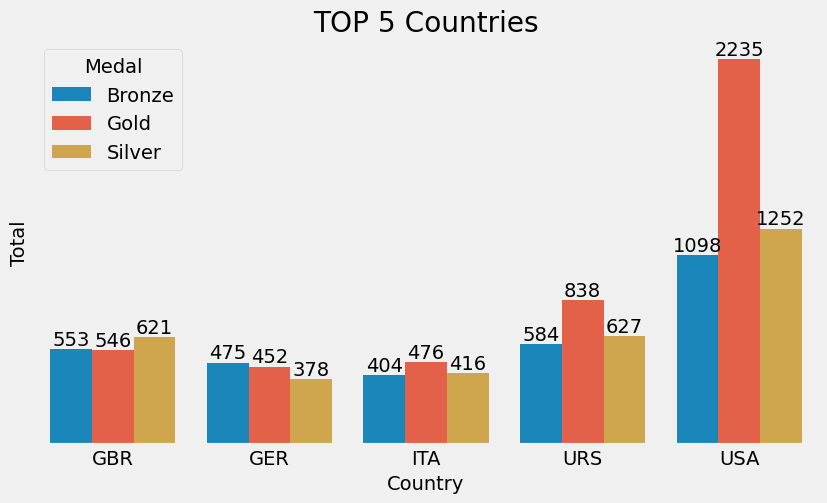

In [11]:
# Total Medals by Country
plt.figure(figsize=(9,5))
sns.barplot(data=total_meda_by_country, x="Country", y="Total", hue="Medal")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.ylabel("Total", fontsize=14)
plt.xlabel("Country", fontsize=14)
plt.title("TOP 5 Countries")
plt.show()

In [12]:
#top_15_athlete
top_15_athlete = summer.groupby(['Athlete', 'Medal'])['Total'].sum().reset_index().pivot_table(index='Athlete', columns="Medal", values="Total").sort_values("Gold", ascending=False).head(15)
top_15_athlete 

Medal,Bronze,Gold,Silver
Athlete,,,
"PHELPS, Michael",2.0,18.0,2.0
"LEWIS, Carl",NaN,9.0,1.0
"NURMI, Paavo",NaN,9.0,3.0
"SPITZ, Mark",1.0,9.0,1.0
"LATYNINA, Larisa",4.0,9.0,5.0
"BIONDI, Matthew",1.0,8.0,2.0
"THOMPSON, Jenny",1.0,8.0,3.0
"EWRY, Ray",NaN,8.0,NaN
"KATO, Sawao",1.0,8.0,3.0


In [13]:
top_15_athlete = top_15_athlete.reset_index().merge(summer.drop_duplicates(subset='Athlete')[['Athlete', 'Country']], on="Athlete", how="left")

In [14]:
top_15_athlete

,Athlete,Bronze,Gold,Silver,Country
0,"PHELPS, Michael",2.0,18.0,2.0,USA
1,"LEWIS, Carl",NaN,9.0,1.0,USA
2,"NURMI, Paavo",NaN,9.0,3.0,FIN
3,"SPITZ, Mark",1.0,9.0,1.0,USA
4,"LATYNINA, Larisa",4.0,9.0,5.0,URS
5,"BIONDI, Matthew",1.0,8.0,2.0,USA
6,"THOMPSON, Jenny",1.0,8.0,3.0,USA
7,"EWRY, Ray",NaN,8.0,NaN,USA
8,"KATO, Sawao",1.0,8.0,3.0,JPN
9,"FISCHER, Birgit",NaN,8.0,4.0,GDR


In [15]:
order = top_15_athlete.Country.value_counts().index.values

Text(0.5, 0, 'Country')

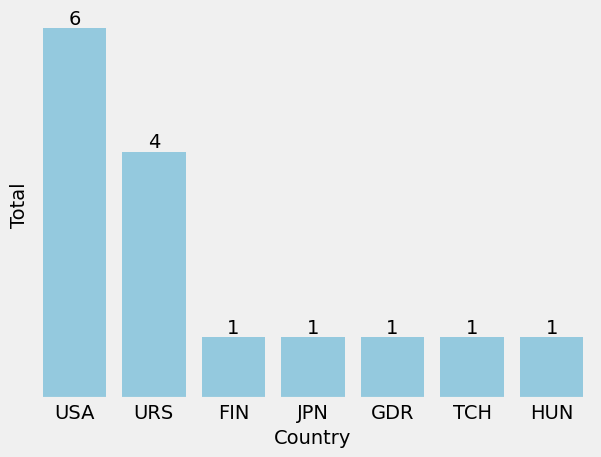

In [16]:
sns.countplot(data=top_15_athlete, x="Country", order=order, color="skyblue")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.ylabel("Total", fontsize=14)
plt.xlabel("Country", fontsize=14)

In [17]:
#top 10 sports
top_10_sports = summer[summer['Medal']=="Gold"].groupby('Sport')['Total'].sum().sort_values(ascending=False).head(10).index.values
summer = summer[summer['Sport'].isin(top_10_sports)]
df = pd.crosstab(index=summer['Sport'], columns=summer.Country, values=summer.Total, aggfunc=np.sum)

In [18]:
df.dropna(axis=1,inplace=True)

<Axes: xlabel='Country', ylabel='Sport'>

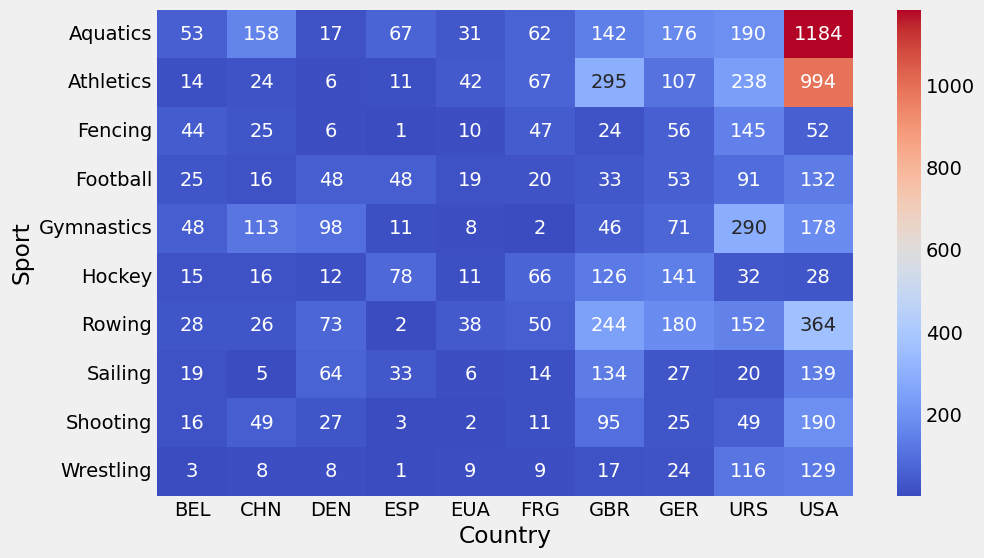

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df, annot=True, fmt = ".0f", cmap="coolwarm")

# winter Olympic Games

In [20]:
# winter Olympic Games
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [21]:
# 1924 - 2014
winter.Year.value_counts().sort_index()

Year
1924    118
1928     89
1932    116
1936    108
1948    140
1952    136
1956    150
1960    147
1964    185
1968    199
1972    200
1976    210
1980    218
1984    222
1988    264
1992    325
1994    343
1998    447
2002    481
2006    531
2010    529
2014    612
Name: count, dtype: int64

In [22]:
# Gender
winter.Gender.value_counts().sort_index()

Gender
Men      3944
Women    1826
Name: count, dtype: int64

In [23]:
winter['Total'] = 1

In [24]:
# Total by Gender
total_by_gender = winter.groupby(['Year', "Gender"])['Total'].sum().reset_index().pivot_table(index='Year', columns='Gender', values='Total')
total_by_gender

Gender,Men,Women
Year,,
1924,112.0,6.0
1928,83.0,6.0
1932,110.0,6.0
1936,99.0,9.0
1948,125.0,15.0
1952,118.0,18.0
1956,123.0,27.0
1960,108.0,39.0
1964,139.0,46.0


Text(0.5, 1.0, 'Total medals by Gender')

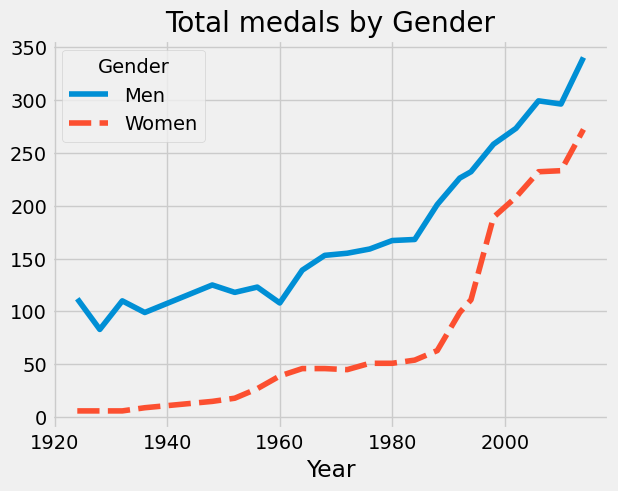

In [25]:
sns.lineplot(data=total_by_gender)
plt.title("Total medals by Gender")

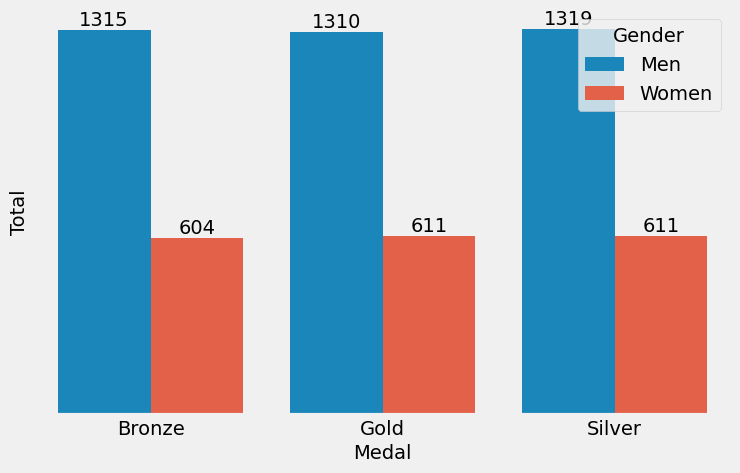

In [26]:
# Total Medals by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=winter, x="Medal", hue="Gender")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.ylabel("Total", fontsize=14)
plt.xlabel("Medal", fontsize=14)
plt.show()

In [27]:
countries = winter.groupby(['Country', 'Medal'])['Total'].sum().reset_index().pivot_table(index='Country', columns='Medal', values='Total').sort_values("Gold", ascending=False).head(5).reset_index().Country.values

total_medal_by_country = winter[winter['Country'].isin(countries)].groupby(['Country', 'Medal'])['Total'].sum().reset_index()

total_medal_by_country

,Country,Medal,Total
0,CAN,Bronze,107
1,CAN,Gold,315
2,CAN,Silver,203
3,GER,Bronze,97
4,GER,Gold,137
5,GER,Silver,126
6,NOR,Bronze,127
7,NOR,Gold,159
8,NOR,Silver,171
9,URS,Bronze,93


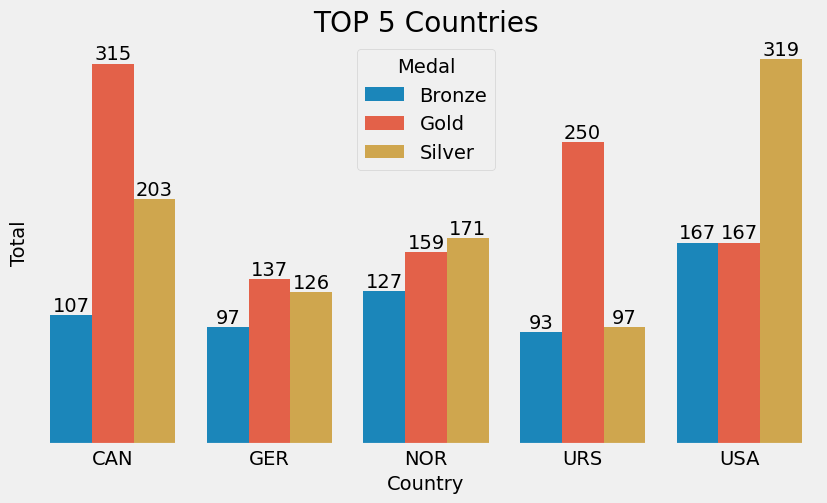

In [28]:
# Total Medals by Country
plt.figure(figsize=(9,5))
sns.barplot(data=total_medal_by_country, x="Country", y="Total", hue="Medal")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.ylabel("Total", fontsize=14)
plt.xlabel("Country", fontsize=14)
plt.title("TOP 5 Countries")
plt.show()

In [29]:
#top 10 sports
df = pd.crosstab(index=winter['Sport'], columns=winter.Country, values=summer.Total, aggfunc=np.sum)

In [30]:
df.dropna(axis=1,inplace=True, thresh=5)
df.fillna(0, inplace=True)

In [31]:
df

Country,AUT,CAN,FIN,FRA,FRG,GBR,GDR,GER,ITA,RUS,SUI,SWE,URS,USA
Sport,,,,,,,,,,,,,,
Biathlon,9.0,3.0,14.0,42.0,14.0,0.0,19.0,62.0,7.0,41.0,5.0,15.0,31.0,0.0
Bobsleigh,8.0,16.0,0.0,0.0,22.0,10.0,38.0,58.0,17.0,7.0,82.0,0.0,8.0,52.0
Curling,0.0,25.0,5.0,6.0,0.0,8.0,0.0,0.0,0.0,0.0,20.0,21.0,0.0,5.0
Ice Hockey,0.0,268.0,152.0,0.0,18.0,8.0,0.0,10.0,0.0,46.0,38.0,187.0,139.0,206.0
Luge,18.0,0.0,0.0,0.0,11.0,0.0,31.0,38.0,14.0,6.0,0.0,0.0,5.0,9.0
Skating,26.0,114.0,20.0,14.0,3.0,7.0,31.0,51.0,24.0,62.0,1.0,11.0,71.0,129.0
Skiing,160.0,32.0,151.0,57.0,18.0,1.0,21.0,79.0,70.0,50.0,70.0,119.0,89.0,80.0


<Axes: xlabel='Country', ylabel='Sport'>

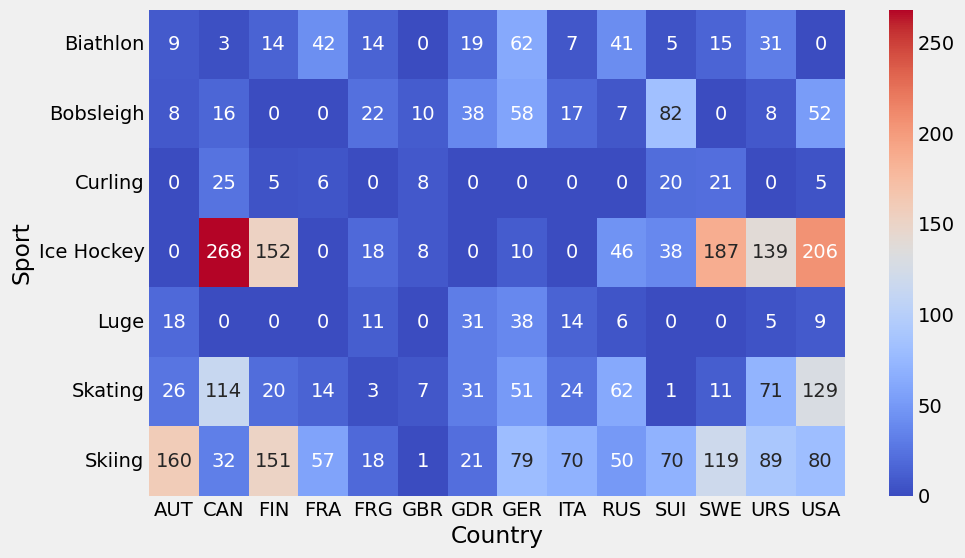

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df, annot=True, fmt = ".0f", cmap="coolwarm")

In [33]:
#top_15_athlete
top_15_athlete = winter.groupby(['Athlete', 'Medal'])['Total'].sum().reset_index().pivot_table(index='Athlete', columns="Medal", values="Total").sort_values("Gold", ascending=False).head(15)
top_15_athlete 

Medal,Bronze,Gold,Silver
Athlete,,,
"DAEHLIE, Björn",NaN,8.0,4.0
"BJOERNDALEN, Ole Einar",1.0,8.0,4.0
"SKOBLIKOVA, Lidiya",NaN,6.0,NaN
"BJOERGEN, Marit",1.0,6.0,2.0
"EGOROVA, Ljubov",NaN,6.0,3.0
"ALSGAARD, Thomas",NaN,5.0,1.0
"LAZUTINA, Larissa",1.0,5.0,1.0
"BLAIR, Bonnie",1.0,5.0,NaN
"PECHSTEIN, Claudia",2.0,5.0,2.0


In [34]:
top_15_athlete = top_15_athlete.reset_index().merge(winter.drop_duplicates(subset='Athlete')[['Athlete', 'Country']], on="Athlete", how="left")

In [35]:
top_15_athlete 

,Athlete,Bronze,Gold,Silver,Country
0,"DAEHLIE, Björn",NaN,8.0,4.0,NOR
1,"BJOERNDALEN, Ole Einar",1.0,8.0,4.0,NOR
2,"SKOBLIKOVA, Lidiya",NaN,6.0,NaN,URS
3,"BJOERGEN, Marit",1.0,6.0,2.0,NOR
4,"EGOROVA, Ljubov",NaN,6.0,3.0,EUN
5,"ALSGAARD, Thomas",NaN,5.0,1.0,NOR
6,"LAZUTINA, Larissa",1.0,5.0,1.0,EUN
7,"BLAIR, Bonnie",1.0,5.0,NaN,USA
8,"PECHSTEIN, Claudia",2.0,5.0,2.0,GER
9,"THUNBERG, Clas",1.0,5.0,1.0,FIN


In [36]:
order = top_15_athlete.Country.value_counts().index.values

Text(0.5, 0, 'Country')

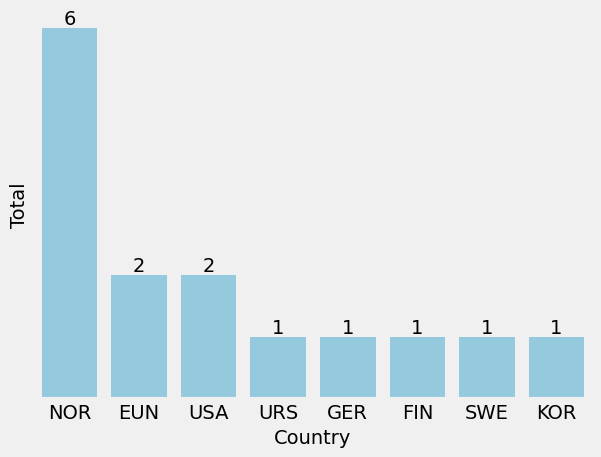

In [37]:
sns.countplot(data=top_15_athlete, x="Country", order=order, color="skyblue")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.ylabel("Total", fontsize=14)
plt.xlabel("Country", fontsize=14)